## **Exploring Data Distributions: An Analysis of User Behavior**
This project visualizes the distribution of categorical and continuous variables, such as age, gender, and app usage, using bar charts and histograms. The aim is to analyze user behavior patterns and extract actionable insights as part of my internship task 1.

### **1. Import Libraries**
Lets import all the necessary libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

### **2. Load Dataset**
Lets load the dataset and preview it's structure and first few rows.

In [8]:
# Load the dataset
mobile_df = pd.read_csv('mobile_usage_behavioral_analysis.csv')

# Display dataset info
print("Dataset Overview:\n")
print(mobile_df.info())
# no of rows and columns in dataset
print(mobile_df.shape)
# Print first 5 rows of dataset
print(mobile_df.head())

Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User_ID                       1000 non-null   int64  
 1   Age                           1000 non-null   int64  
 2   Gender                        1000 non-null   object 
 3   Total_App_Usage_Hours         1000 non-null   float64
 4   Daily_Screen_Time_Hours       1000 non-null   float64
 5   Number_of_Apps_Used           1000 non-null   int64  
 6   Social_Media_Usage_Hours      1000 non-null   float64
 7   Productivity_App_Usage_Hours  1000 non-null   float64
 8   Gaming_App_Usage_Hours        1000 non-null   float64
 9   Location                      1000 non-null   object 
dtypes: float64(5), int64(3), object(2)
memory usage: 78.3+ KB
None
(1000, 10)
   User_ID  Age  Gender  Total_App_Usage_Hours  Daily_Screen_Time_Hours  \
0        1   

- we have 10 columns and 1000 rows(entries)
- we have two types of variables : continuous and categorical

### **3. Identify Categorical and Continuous Variables**
I have separated the variables into categorical and continuous based on their data types.

In [9]:
categorical_vars = mobile_df.select_dtypes(include=['object', 'category']).columns.tolist()
continuous_vars = mobile_df.select_dtypes(include=['int64','float64']).columns.tolist()

print("Categorical variables: ", categorical_vars)
print("Continuous variables: ",continuous_vars)

Categorical variables:  ['Gender', 'Location']
Continuous variables:  ['User_ID', 'Age', 'Total_App_Usage_Hours', 'Daily_Screen_Time_Hours', 'Number_of_Apps_Used', 'Social_Media_Usage_Hours', 'Productivity_App_Usage_Hours', 'Gaming_App_Usage_Hours']


- we have 2 categorical variables and 8 continuous variables

### **4. Handle missing values**
Lets check for missing values and drop rows with missing values(if any) for simplicity of data or fill them with 0.

In [10]:
# check each column for missing values
print(mobile_df.isna().any())

User_ID                         False
Age                             False
Gender                          False
Total_App_Usage_Hours           False
Daily_Screen_Time_Hours         False
Number_of_Apps_Used             False
Social_Media_Usage_Hours        False
Productivity_App_Usage_Hours    False
Gaming_App_Usage_Hours          False
Location                        False
dtype: bool


- There are no missing values in our dataset. 

### **5. Data Visualization**

#### **Visualize Categorical Variables**
Now, Lets create bar charts to visualize the distribution of each categorical variable because they show the number of users that fall in each category. 

Gender DataFrame: 
   Gender  Count
M    Male    517
F  Female    483
Gender Summary statistics: 
            Count
count    2.000000
mean   500.000000
std     24.041631
min    483.000000
25%    491.500000
50%    500.000000
75%    508.500000
max    517.000000


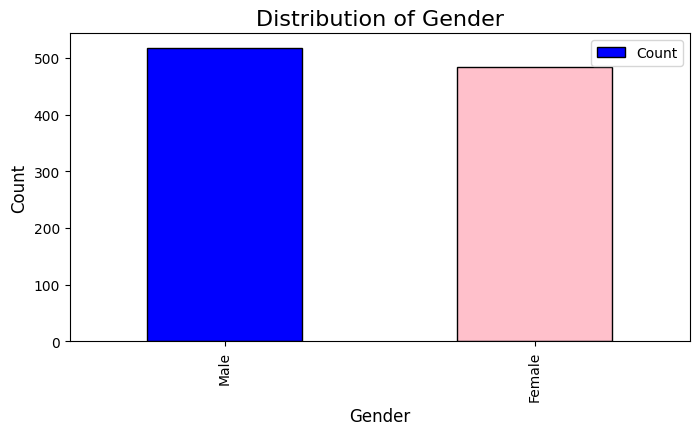

Location DataFrame: 
        Location  Count
NY      New York    243
PH       Phoenix    199
CH       Chicago    192
LA   Los Angeles    185
HOU      Houston    181
Location Summary statistics: 
       Count
count    5.0
mean   200.0
std     25.0
min    181.0
25%    185.0
50%    192.0
75%    199.0
max    243.0


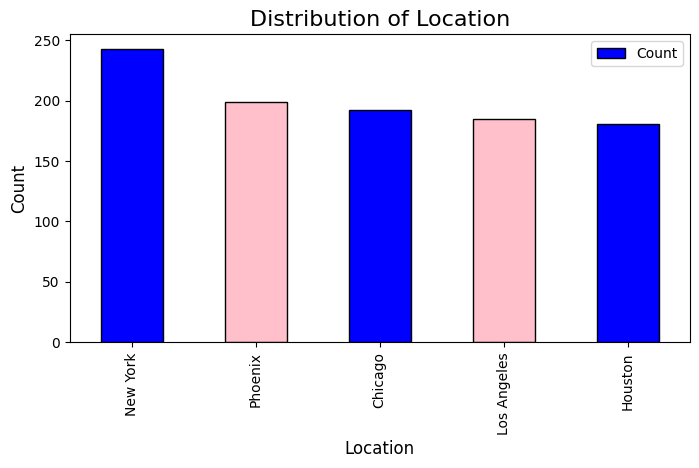

In [11]:
# Bar charts for each categorical variable 
for var in categorical_vars:
    if var in mobile_df.columns:
        counts = mobile_df[var].value_counts()  # Get counts for each category
        
        # Convert the counts Series to a DataFrame
        counts_df = counts.reset_index()
        counts_df.columns = [var, 'Count']  # Rename columns for clarity
        
        # print(counts_df)
        if var == 'Gender':
            row_label = ['M','F']
        elif var == 'Location':
            row_label = ['NY','PH','CH','LA','HOU']
            
        counts_df.index = row_label
        print(f"{var} DataFrame: ")
        print(counts_df)
        print(f'{var} Summary statistics: ')
        print(counts_df.describe()) # summary statistics for each categorical variable
        
        # Plotting the bar chart
        counts_df.plot(x=var, y='Count', kind='bar', color=['blue','pink'], edgecolor='black', figsize=(8,4))
        plt.title(f'Distribution of {var}', fontsize=16)
        plt.xlabel(var, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.show()
    else:
        print(f"Variable {var} not found in dataset.")


#### **Insights from Categorical Variables Distributions**

**1. Insights for Gender Distribution**
The dataset features a **balanced** gender distribution, with **51.7% male** and **48.3% female** users, indicating **minimal bias**. The average user count per gender is about **500**, with low variation (standard deviation of **24.04**).

**2. Insights for Location Distribution**
Users are spread across **five** locations, with **New York** having the highest count **(243 users)** and **Houston** the lowest **(181 users)**. Despite moderate variation, New York is **overrepresented**, contributing to **24.3%** of the total users.

For detailed insights, refer to the **[Insights Report](insights_report.ipynb)**.

#### **Visualize Continuous Variables**
Now, Lets create histograms to visualize the distribution of each continuous variable. Histograms help us in understanding the frequency of values for each continuous variable and provide insights into patterns, central tendencies, and outliers in our data.

Summary Statistics of User_ID
count    1000.000000
mean      500.500000
std       288.819436
min         1.000000
25%       250.750000
50%       500.500000
75%       750.250000
max      1000.000000
Name: User_ID, dtype: float64


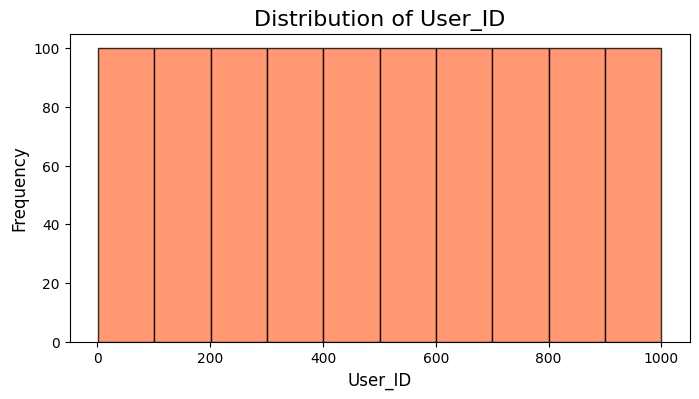

Summary Statistics of Age
count    1000.000000
mean       38.745000
std        12.186734
min        18.000000
25%        28.000000
50%        40.000000
75%        50.000000
max        59.000000
Name: Age, dtype: float64


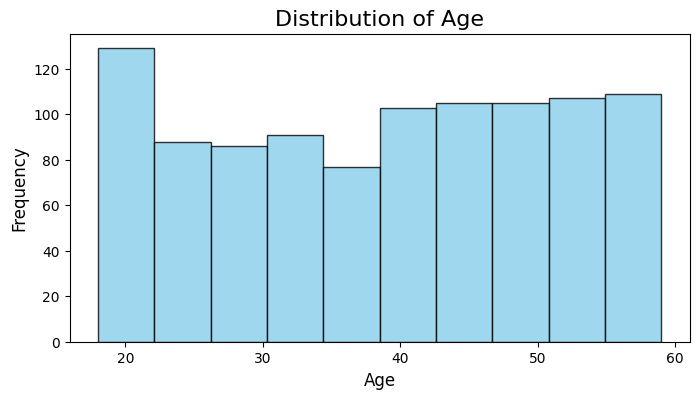

Summary Statistics of Total_App_Usage_Hours
count    1000.000000
mean        6.405670
std         3.134855
min         1.000000
25%         3.590000
50%         6.455000
75%         9.122500
max        11.970000
Name: Total_App_Usage_Hours, dtype: float64


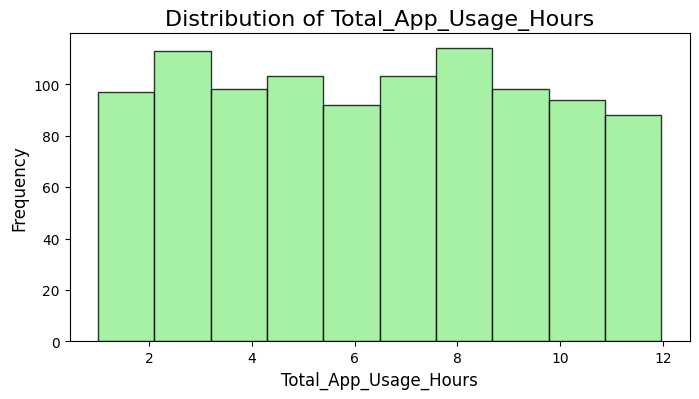

Summary Statistics of Daily_Screen_Time_Hours
count    1000.000000
mean        7.696310
std         3.714187
min         1.010000
25%         4.530000
50%         7.880000
75%        10.910000
max        14.000000
Name: Daily_Screen_Time_Hours, dtype: float64


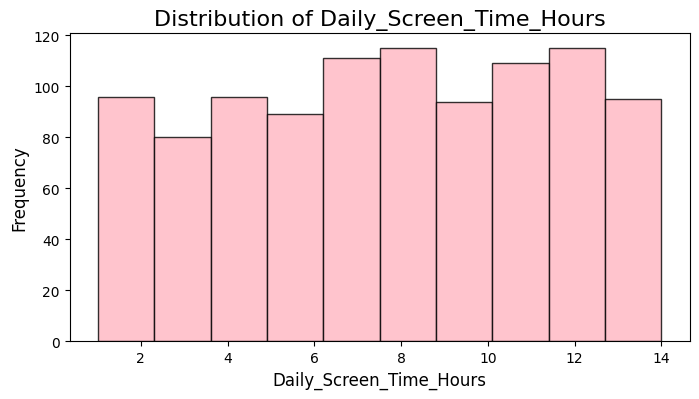

Summary Statistics of Number_of_Apps_Used
count    1000.00000
mean       16.64700
std         7.61961
min         3.00000
25%        10.00000
50%        17.00000
75%        23.00000
max        29.00000
Name: Number_of_Apps_Used, dtype: float64


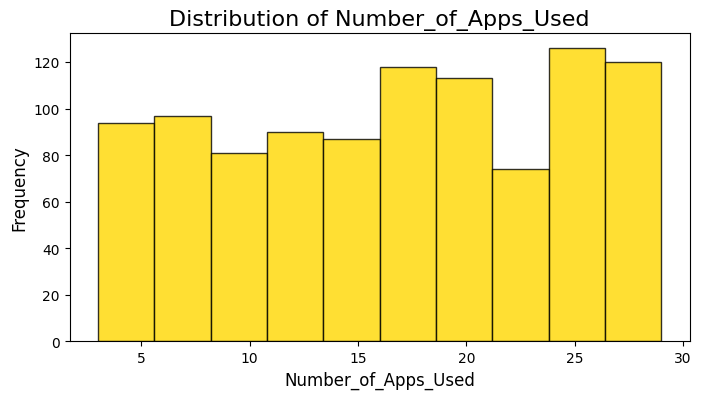

Summary Statistics of Social_Media_Usage_Hours
count    1000.000000
mean        2.456330
std         1.439525
min         0.000000
25%         1.200000
50%         2.445000
75%         3.672500
max         4.990000
Name: Social_Media_Usage_Hours, dtype: float64


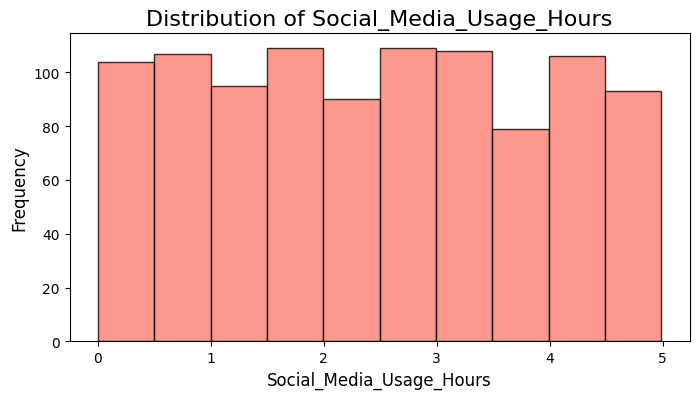

Summary Statistics of Productivity_App_Usage_Hours
count    1000.000000
mean        2.495270
std         1.443392
min         0.000000
25%         1.282500
50%         2.435000
75%         3.710000
max         5.000000
Name: Productivity_App_Usage_Hours, dtype: float64


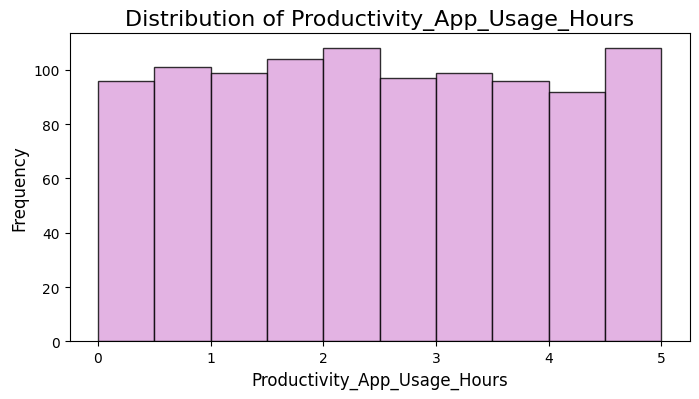

Summary Statistics of Gaming_App_Usage_Hours
count    1000.000000
mean        2.475410
std         1.450362
min         0.010000
25%         1.220000
50%         2.455000
75%         3.782500
max         5.000000
Name: Gaming_App_Usage_Hours, dtype: float64


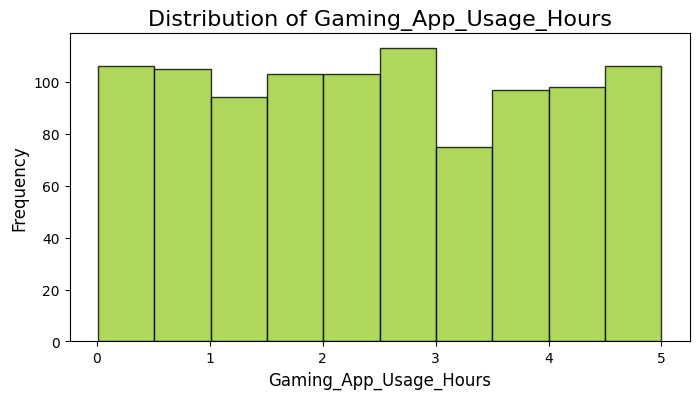

In [12]:
# Histograms for each continuous variable

colors = ['coral', 'skyblue', 'lightgreen', 'lightpink', 'gold', 'salmon', 'plum', 'yellowgreen']

for idx, var in enumerate(continuous_vars):
    if var in mobile_df.columns:
        print(f"Summary Statistics of {var}")
        print(mobile_df[var].describe())
        plt.figure(figsize=(8, 4))
        plt.hist(mobile_df[var], bins=10, color=colors[idx % len(colors)], edgecolor='black', alpha=0.8)
        plt.xlabel(var, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.title(f'Distribution of {var}', fontsize=16)
        plt.show()
    else:
        print(f"Variable {var} not found in the dataset.")


#### **Insights from Continuous Variables Distributions**

**1. Insights from User_ID Distribution:** 

The **User_ID** values are uniformly distributed across the range of **1 to 1000**, with a **mean** and **median** of **500.5**. The data shows **consistent** and **even distribution**, with no **outliers** or **clustering**.

**2. Insights from Age Distribution:** 

The dataset includes users aged **18 to 59**, with the highest frequency in the **20–29** age group. The **average age** is approximately **38.7 years**, showing less **variability** around the central age range.

**3. Insights from Total App Usage Hours Distribution:** 

Users daily app usage ranges from **1 to 12 hours**, with an **average** of **6.4 hours**. Most users are fairly evenly distributed, with a slight peak around **8 hours** of daily usage.

**4. Insights from Daily Screen Time Hours Distribution:** 

The daily screen time varies between **1.01 to 14 hours**, with an **average** of **7.7 hours**. There is significant **variability**, with users spending between **4.53 to 10.91 hours** on screens daily.

**5. Insights from Number of Apps Used Distribution:** 

Users utilize between **3 and 29 apps**, with an **average** of **16.65 apps**. The data shows considerable **variability**, with some users using fewer than **10** or more than **23 apps** daily.

**6. Insights from Social Media Usage Hours Distribution:** 

Social media usage ranges from **0 to 4.99 hours** daily, with an **average** of **2.45 hours**. The distribution is **symmetric**, with a concentration between **1.2 to 3.67 hours** of usage daily.

**7. Insights from Productivity App Usage Hours Distribution:** 

The daily usage of productivity apps ranges from **0 to 5 hours**, with an **average** of **2.5 hours**. Most users spend between **1.28 to 3.71 hours** on productivity apps daily.

**8. Insights from Gaming App Usage Hours Distribution:** 

Gaming app usage ranges from **0.01 to 5 hours** daily, with an **average** of **2.48 hours**. Most users spend between **1.22 to 3.78 hours** on gaming apps, with some **outliers** on both ends.

For detailed insights, refer to the **[Insights Report](insights_report.ipynb)**.